### DataGlacier Cab Dataset Analyzation (EDA Notebook)


#### Description
An analyzation of four datasets, and one dataset retrieved from [World Population Review](https://worldpopulationreview.com/us-cities). The analyzation consists of 6 hypotheses that are tested.

### Reading in & Understanding Datasets

In [1]:
f = open('City.csv', 'rt')
str_all = ''
for line in f:
    lst_temp = list(line)
    bool_quotation = False
    for i in range(0, len(lst_temp)):
        try:
            if(lst_temp[i] == '"'):
                bool_quotation = not bool_quotation
            if(bool_quotation):
                if(lst_temp[i] == ','):
                    del lst_temp[i]
        except:
            pass
    str_output = ''
    for letter in lst_temp:
        str_output += letter
    str_all += str_output
f.close()

w = open('City_no_comma.csv', 'wt')
w.write(str_all)
w.close()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from datetime import datetime

df = pd.read_csv('Cab_Data.csv')
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df["Converted Date of Travel"] = df["Date of Travel"].astype(int).map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))

df_city = pd.read_csv('City_no_comma.csv')
df_customers = pd.read_csv('Customer_ID.csv')
df_transactions = pd.read_csv('Transaction_ID.csv')



print('Summary of Cab_Data.csv Dataframe')
print(df.describe().loc[['count', 'mean']], '\n------------------------\n')

print('Summary of City.csv Dataframe')
print(df_city.describe().loc['count',:], '\n------------------------\n')


print('Summary of Customer_ID.csv Dataframe')
print(df_customers.describe().loc[['count', 'mean', 'min', 'max']], '\n------------------------\n')

print('Summary of Transaction_ID.csv Dataframe')
print(df_transactions.info(), '\n------------------------')


Summary of Cab_Data.csv Dataframe
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   

        Cost of Trip         Profit  
count  359392.000000  359392.000000  
mean      286.190113     137.253198   
------------------------

Summary of City.csv Dataframe
Population    20.0
Users         20.0
Name: count, dtype: float64 
------------------------

Summary of Customer_ID.csv Dataframe
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
min        1.000000     18.000000         2000.000000
max    60000.000000     65.000000        35000.000000 
------------------------

Summary of Transaction_ID.csv Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #  

### Merging Datasets

In [3]:
df_join = pd.merge(df, df_transactions, how = 'outer', on = 'Transaction ID')

df_join_2 = pd.merge(df_join, df_customers, how = 'outer', on = 'Customer ID')

df_master = df_join_2.drop(['Price Charged', 'Cost of Trip', 'Date of Travel'], axis = 1)

df_master.reindex(columns = ['Transaction ID', 'Converted Date of Travel', 'Company', 'City', 'KM Travelled', 'Profit', 'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)'])

,Transaction ID,Converted Date of Travel,Company,City,KM Travelled,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,57.3150,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,281.2772,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,194.6480,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,23.6660,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,253.9808,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaT,NaN,NaN,NaN,NaN,23382,Card,Female,51,18919
440094,10439409,NaT,NaN,NaN,NaN,NaN,21420,Card,Female,18,4531
440095,10439413,NaT,NaN,NaN,NaN,NaN,49888,Card,Male,23,3226
440096,10439418,NaT,NaN,NaN,NaN,NaN,46456,Cash,Male,20,30662


----------
### (1) Graph of Cab Users by City Separated by Company


**Experimental Hypothesis**:
There is a customer preference for Cab Company; there is also customer preference in certain areas.

**Null Hypothesis**:
There is neither a customer preference for Cab Company in total and by area

Pink Cab Frequency: 84711
Pink Cab Sum Profit: 5307328.32
Yellow Cab Frequency: 274681
Yellow Cab Sum Profit 44020373.17
19


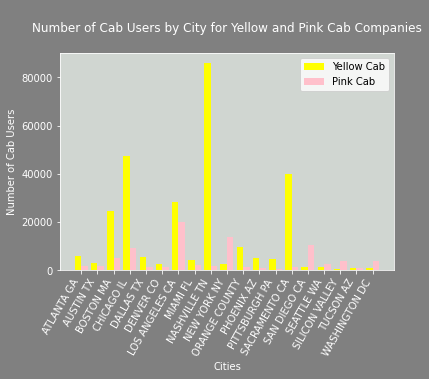

In [4]:
df_master['Pink Profit'] = df_master.loc[df_master['Company'] == 'Pink Cab', ['Profit']]
df_master['Yellow Profit'] = df_master.loc[df_master['Company'] == 'Yellow Cab', ['Profit']]

dfp = df_master.loc[:, ['Converted Date of Travel', 'Company', 'City', 'Pink Profit']]
dfp = dfp[~dfp['Pink Profit'].isnull()]

dfy = df_master.loc[:, ['Converted Date of Travel', 'Company', 'City', 'Yellow Profit']]
dfy = dfy[~dfy['Yellow Profit'].isnull()]

print('Pink Cab Frequency:', len(dfp['City']))
print('Pink Cab Sum Profit:', dfp['Pink Profit'].sum().round(2))
print('Yellow Cab Frequency:', len(dfy['City']))
print('Yellow Cab Sum Profit', dfy['Yellow Profit'].sum().round(2))

lst_cities = dfy['City'].unique()
dict_yellow_city_count = {}

print(len(lst_cities))

for city in lst_cities:
    dict_yellow_city_count[city] = dfy.loc[dfy['City'] == city].size/4
    
# print(dict_yellow_city_count)

####

lst_cities = dfp['City'].unique()
dict_pink_city_count = {}

for city in lst_cities:
    dict_pink_city_count[city] = dfp.loc[dfp['City'] == city].size/4
    
# print(dict_pink_city_count)


x = list(dict_pink_city_count.keys())
yvalues = list(dict_yellow_city_count.values())
pvalues = list(dict_pink_city_count.values())

# print(x)
# print(yvalues)
# print(pvalues)

plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("#d0d6d1")
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, yvalues, 0.4, label = 'Yellow Cab', color = 'Yellow')
plt.bar(x_axis + 0.2, pvalues, 0.4, label = 'Pink Cab', color = 'Pink')



plt.xticks(x_axis, x, rotation = 60, ha = 'right', color = 'white')
plt.xlabel("Cities", color = 'white')
plt.ylabel("Number of Cab Users", color = 'white')
plt.title("\nNumber of Cab Users by City for Yellow and Pink Cab Companies\n", color = 'white')
plt.legend()
plt.show()

**Conclusion:**

Experimental Hypothesis accepted; there is indeed a preference for a certain cab in areas. There is a higher usage of the Yellow Cab Company in the cities of Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, Nashville, Orange County, Phoenix, Pittsburgh, Sacramento. There is a higher usage of the Pink Cab Company in the cities of New York City, San Deigo, Silicon Valley, Tucson and Washington DC.

----------
### (2) Graph of Profit / Loss / Neutral of Cab Companies

**Experimental Hypothesis:**
There is a correlation between the relationship between 'profit, loss and neutral' and company

**Null Hypothesis:**
There is no correlation in 'profit, loss and neutral' by company

			 Yellow Cab Profit Distribution 		 Pink Cab Profit Distribution
Profit:			 260989 					 73580
Loss:			 13690 						 11129
Neutral:		 2 						 2
Total:			 44020373.17079999 				 5307328.3209999995


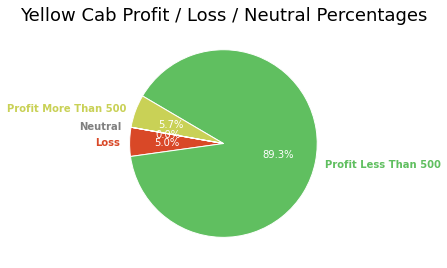

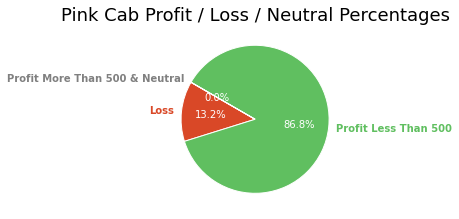

In [5]:
print('\t\t\t Yellow Cab Profit Distribution', '\t\t Pink Cab Profit Distribution')
print('Profit:\t\t\t', (dfy['Yellow Profit']>0).sum(), '\t\t\t\t\t', (dfp['Pink Profit']>0).sum())
print('Loss:\t\t\t', (dfy['Yellow Profit']<0).sum(), '\t\t\t\t\t\t', (dfp['Pink Profit']<0).sum()) 
print('Neutral:\t\t', (dfy['Yellow Profit']==0).sum(), '\t\t\t\t\t\t', (dfp['Pink Profit']==0).sum())
print('Total:\t\t\t', (dfy['Yellow Profit']).sum(), '\t\t\t\t', (dfp['Pink Profit']).sum())

yellow_profit_data = [(dfy['Yellow Profit']<0).sum(), ((dfy['Yellow Profit']>0) & (dfy['Yellow Profit']<500)).sum(), (dfy['Yellow Profit']>500).sum(),(dfy['Yellow Profit']==0).sum()]
profit_labels = 'Loss', 'Profit Less Than 500', 'Profit More Than 500', 'Neutral'

fig, ax = plt.subplots(figsize=(6, 6))


patches, texts, pcts = ax.pie(
    yellow_profit_data, labels=profit_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=170,
    colors = ['#d94827', '#60bf60', '#c9d156', 'Grey'])
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Yellow Cab Profit / Loss / Neutral Percentages', fontsize=18, color = "Black")
plt.tight_layout()
plt.show()


pink_profit_data = [(dfp['Pink Profit']<0).sum(), ((dfp['Pink Profit']>0)  & (dfp['Pink Profit']<500)).sum(), (dfp['Pink Profit']==0).sum()]
profit_labels_2 = 'Loss', 'Profit Less Than 500', 'Profit More Than 500 & Neutral'

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    pink_profit_data, labels=profit_labels_2, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=150,
    colors = ['#d94827', '#60bf60', 'Grey'])
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Pink Cab Profit / Loss / Neutral Percentages', fontsize=18, color = "Black")
plt.tight_layout()
plt.show()

# print(dfy.loc[dfy['Yellow Profit'] < 0],dfy['City'])
# for city in lst_cities:
#     print(city, dfp.loc[(dfp['City'] == city) & (dfp['Pink Profit'] < 0)].size/4)

**Conclusion:**

Experimental Hypothesis accepted; The Yellow Cab Company was found to make more profit, and even have profits over 500 (5.7% of all transactions compared to 0% of the Pink Cab Company)

----------
### (3) Graph of Cab Distance as an effect of City Size

**Experimental Hypothesis:**
There is a correlation between cab distance and US city size; as size increases, cab distance increases.

**Null Hypothesis:**
There is no correlation between cab distance and US city size.

Text(0.5, 1.0, 'Effect of City Area on Average Cab Distance Travelled')

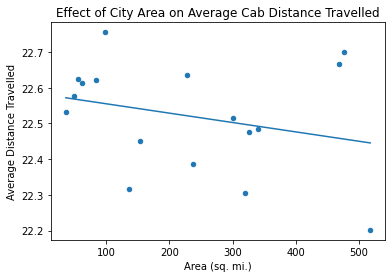

In [6]:
df_city_area = pd.read_csv('City_Size.csv')
df_city_area = df_city_area.sort_values('City')

lst_city_count = []
for city in lst_cities:
    # print(city, len(df_master.loc[df_master['City'] == city]))
    # print(df_master.loc[df_master['City'] == city].describe())
    lst_city_count.append(df_master[df_master['City']==city]['KM Travelled'].mean())

df_temporary = pd.DataFrame(data = {'City':lst_cities, 'Average Distance Travelled':lst_city_count})

df_city_area = pd.merge(df_city_area, df_temporary, how = 'inner', on = 'City')

df_city_area = df_city_area.dropna(axis = 0)

z = np.polyfit(x=df_city_area.loc[:, 'Area (sq. mi.)'], y=df_city_area.loc[:, 'Average Distance Travelled'], deg=1)
p = np.poly1d(z)
df_city_area['Trendline'] = p(df_city_area.loc[:, 'Area (sq. mi.)'])


ax = df_city_area.plot.scatter('Area (sq. mi.)', 'Average Distance Travelled')
df_city_area.set_index('Area (sq. mi.)', inplace=True)
df_city_area.Trendline.sort_index(ascending=False).plot(ax=ax)
ax.set_title('Effect of City Area on Average Cab Distance Travelled')

**Conclusion:**

Null Hypothesis accepted; although there seems to be a slight trend between city area and the average distance travelled, it is overall not significant when both cab companies are compiled together.

----------
### (4) Graph of Dependency of Cab Uses through Time On a National Scale

**Experimental Hypothesis:**
Cab use frequency from both companies change with time in reference to seasons and holidays on a national scale.

**Null Hypothesis:**
Cab use frequency does not change significantly with time.

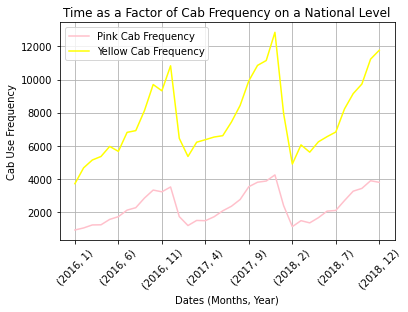

In [7]:
dfy_line_pre = dfy.set_index('Converted Date of Travel')
dfy_line = dfy_line_pre.groupby([dfy_line_pre.index.year.values,dfy_line_pre.index.month.values]).count()
dfy_line = dfy_line.drop(['Company', 'City'], axis = 1)

dfp_line_pre = dfp.set_index('Converted Date of Travel')
dfp_line = dfp_line_pre.groupby([dfp_line_pre.index.year.values,dfp_line_pre.index.month.values]).count()
dfp_line = dfp_line.drop(['Company', 'City'], axis = 1)

df_line = pd.merge(dfp_line, dfy_line, left_index=True, right_index=True)
df_line.columns = ['Pink Cab Frequency', 'Yellow Cab Frequency']

national_line = df_line.plot.line(grid = True, xlabel = 'Dates (Months, Year)', ylabel = 'Cab Use Frequency', title = 'Time as a Factor of Cab Frequency on a National Level', rot = 45, color = ['pink', 'yellow'])

      Yellow Profit  Pink Profit
2016          82239        25080
2017          98189        30321
2018          94253        29310


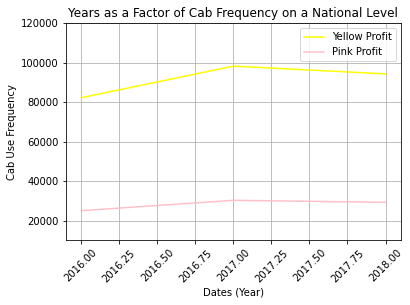

In [8]:
dfy_year_line = dfy_line_pre.groupby(dfy_line_pre.index.year.values).count()
dfy_year_line = dfy_year_line.drop(['Company', 'City'], axis = 1)
dfp_year_line = dfp_line_pre.groupby(dfp_line_pre.index.year.values).count()
dfp_year_line = dfp_year_line.drop(['Company', 'City'], axis = 1)

df_year_line = pd.merge(dfy_year_line, dfp_year_line, left_index=True, right_index = True)
print(df_year_line.head())

national_line_yearly = df_year_line.plot.line(grid = True, xlabel = 'Dates (Year)', ylabel = 'Cab Use Frequency', title = 'Years as a Factor of Cab Frequency on a National Level', rot = 45, color = ['yellow', 'pink'], ylim = [10000,120000])

   Yellow Profit  Pink Profit
1          18117         5057
2          14932         3375
3          17423         4223
4          17351         4083
5          18741         4960


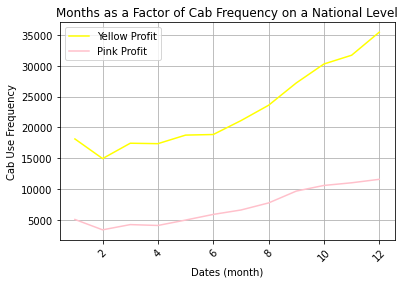

In [9]:
dfy_month_line = dfy_line_pre.groupby(dfy_line_pre.index.month.values).count()
dfy_month_line = dfy_month_line.drop(['Company', 'City'], axis = 1)
dfp_month_line = dfp_line_pre.groupby(dfp_line_pre.index.month.values).count()
dfp_month_line = dfp_month_line.drop(['Company', 'City'], axis = 1)

df_month_line = pd.merge(dfy_month_line, dfp_month_line, left_index=True, right_index = True)
print(df_month_line.head())

national_line_monthly = df_month_line.plot.line(grid = True, xlabel = 'Dates (month)', ylabel = 'Cab Use Frequency', title = 'Months as a Factor of Cab Frequency on a National Level', rot = 45, color = ['yellow', 'pink'])

**Conclusion:**

Experimental Hypothesis accepted; it seems that as more time passes, there is more cab uses. Cab uses are "reset" and are at their lowest at around February of each year and will increase to be at its peak in December.

----------
### (5) Graph of Dependency of Cab Uses through Time On a Provincial Scale

**Experimental Hypothesis:**
There is a correlation between cab use trends across time and the city in which they are recorded.

**Null Hypothesis:**
There is no difference in cab use trends across time in the different cities.

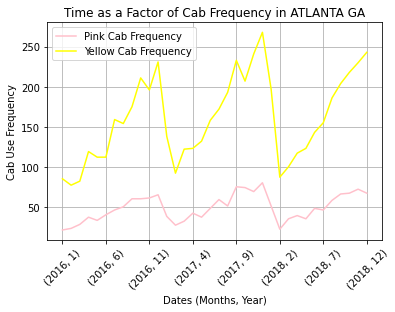

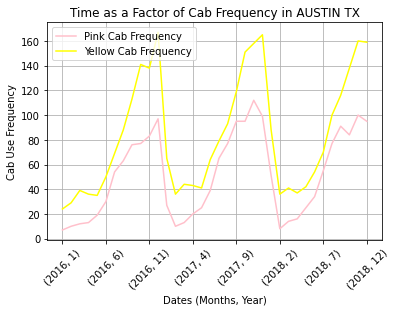

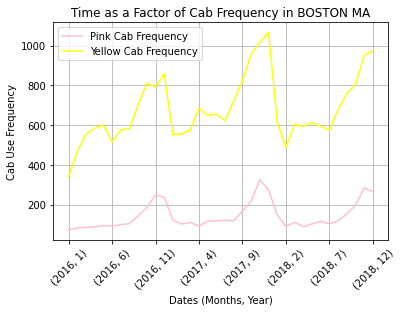

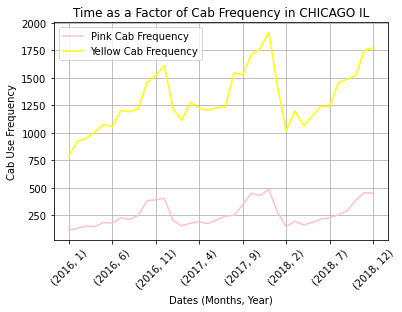

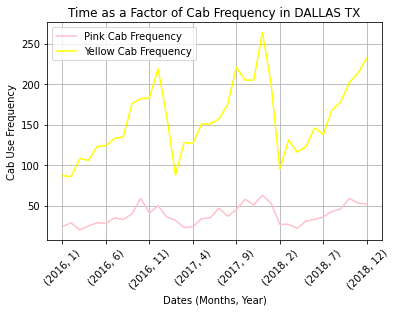

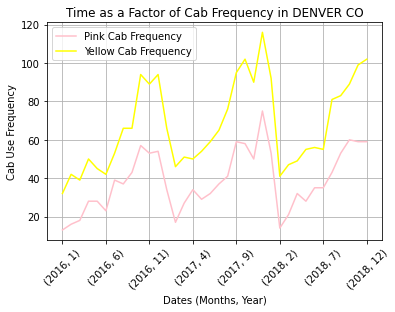

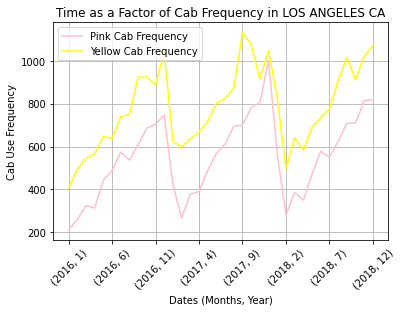

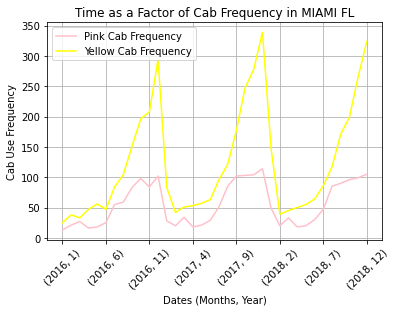

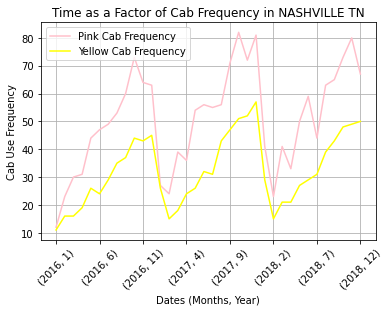

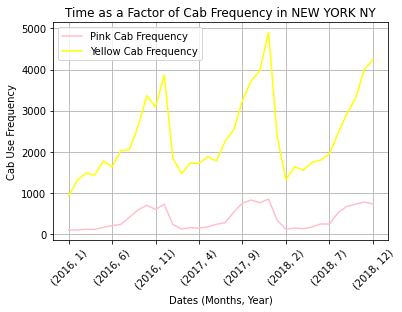

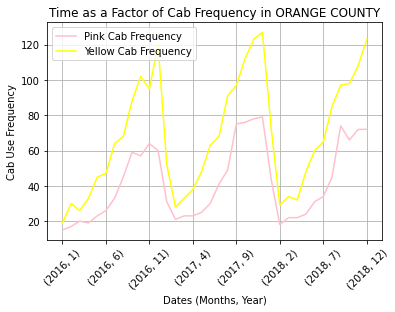

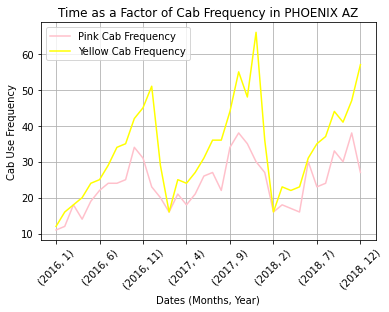

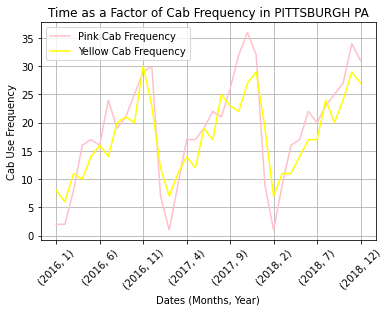

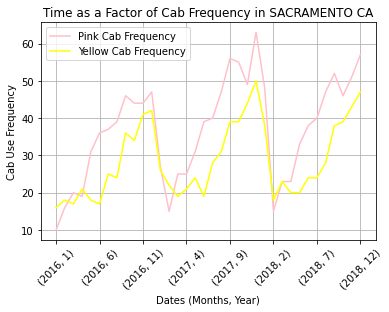

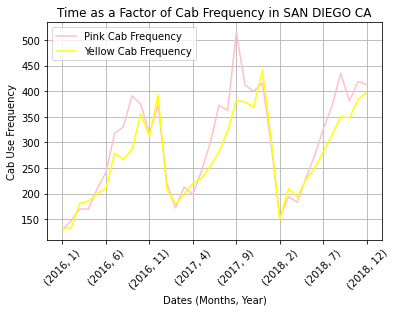

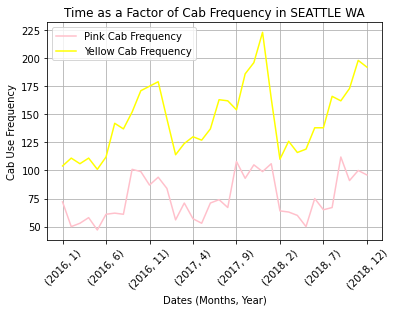

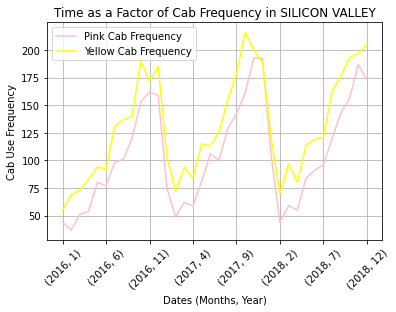

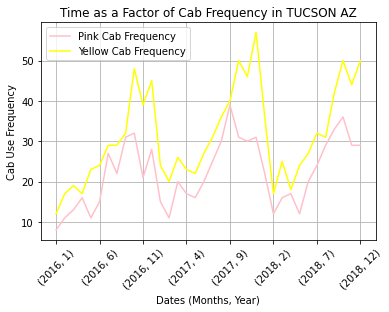

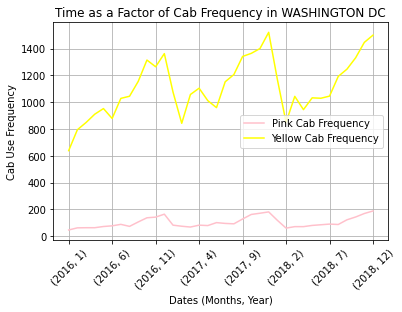

In [10]:
for city in lst_cities:
    dfy_line = dfy_line_pre[dfy_line_pre['City'] == city]
    dfy_line = dfy_line.groupby([dfy_line.index.year.values,dfy_line.index.month.values]).count()
    dfy_line = dfy_line.drop(['Company', 'City'], axis = 1)

    dfp_line = dfp_line_pre[dfp_line_pre['City'] == city]
    dfp_line = dfp_line.groupby([dfp_line.index.year.values,dfp_line.index.month.values]).count()
    dfp_line = dfp_line.drop(['Company', 'City'], axis = 1)

    df_line = pd.merge(dfp_line, dfy_line, left_index=True, right_index=True)
    df_line.columns = ['Pink Cab Frequency', 'Yellow Cab Frequency']

    national_line = df_line.plot.line(grid = True, xlabel = 'Dates (Months, Year)', ylabel = 'Cab Use Frequency', title = f'Time as a Factor of Cab Frequency in {city}', rot = 45, color = ['pink', 'yellow'])

**Conclusion:**

Experimental Hypothesis accepted; there is a difference in trends between cab use and time in the different cities. The graphs above indicate that investments will be more profitable in the cities of Atlanta, Boston, Chicago, Dallas, Miami (during the winter holidays), New York City, Seattle and Washington DC. It can also be observed that different cities have different times of flux; not all cities experience the trends at the same time.

----------
### (6) Graph of Dependency of Pink and Yellow Cab User Percentage of Total Cab Users on the Total Cab Users

**Experimental Hypothesis**: There is a correlation between Yellow and Pink cab users as a percentage of Total Cab Users and the number of Total Cab Users in the dataframe cities.

**Null Hypothesis**: There is no correlation between the percentage and total cab users in the cities.

Average Monthly Users for both Yellow and Pink Cab in the Following Cities 


<AxesSubplot:title={'center':'Percentage of Cab Users Per Total Cab Users as an Effect of Total Cab Users'}, xlabel='Users', ylabel='Percentage of Cab Users per Total Cab Users'>

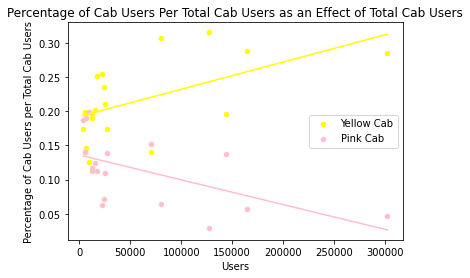

In [11]:
print('Average Monthly Users for both Yellow and Pink Cab in the Following Cities ')
lst_city_averages_pink = []
lst_city_averages_yellow = []
for city in lst_cities:
    df_average = (df_master[['Converted Date of Travel','City', 'Company']])
    df_average.set_index('Converted Date of Travel', inplace = True)
    df_average_p = df_average[(df_average['City']==city) & (df_average['Company'] == 'Pink Cab')]
    df_average_y = df_average[(df_average['City']==city) & (df_average['Company'] == 'Yellow Cab')]

    city_average_p = int(df_average_p['City'].count().round(0))
    lst_city_averages_pink.append(city_average_p)

    city_average_y = int(df_average_y['City'].count().round(0))
    lst_city_averages_yellow.append(city_average_y)

df_city_averages = pd.DataFrame({'City':lst_cities, 'Average Pink Cab Users':lst_city_averages_pink, 'Average Yellow Cab Users':lst_city_averages_yellow})

df_city_averages_plus_population = pd.merge(df_city_averages, df_city, how = 'inner', on = 'City')
df_city_averages_plus_population['Pink Cab Users / Population'] = df_city_averages_plus_population['Average Pink Cab Users'] / df_city_averages_plus_population['Users']
df_city_averages_plus_population['Yellow Cab Users / Population'] = df_city_averages_plus_population['Average Yellow Cab Users'] / df_city_averages_plus_population['Users']

ax = df_city_averages_plus_population.plot.scatter(y = 'Yellow Cab Users / Population', x = 'Users', color = 'yellow', label = 'Yellow Cab', title = 'Percentage of Cab Users Per Total Cab Users as an Effect of Total Cab Users', xlabel = 'Total Cab Users in City')
df_city_averages_plus_population.plot.scatter(y = 'Pink Cab Users / Population', x = 'Users', ax=ax, color = 'pink', label = 'Pink Cab', ylabel = 'Percentage of Cab Users per Total Cab Users', xlabel = 'Total Cab Users in City')

z = np.polyfit(x=df_city_averages_plus_population.loc[:, 'Users'], y=df_city_averages_plus_population.loc[:, 'Yellow Cab Users / Population'], deg=1)
p = np.poly1d(z)
df_city_averages_plus_population['TrendlineY'] = p(df_city_averages_plus_population.loc[:, 'Users'])

z = np.polyfit(x=df_city_averages_plus_population.loc[:, 'Users'], y=df_city_averages_plus_population.loc[:, 'Pink Cab Users / Population'], deg=1)
p = np.poly1d(z)
df_city_averages_plus_population['TrendlineP'] = p(df_city_averages_plus_population.loc[:, 'Users'])

df_city_averages_plus_population.set_index('Users', inplace=True)
df_city_averages_plus_population.TrendlineP.sort_index(ascending=False).plot(ax=ax, color = 'pink')
df_city_averages_plus_population.TrendlineY.sort_index(ascending=False).plot(ax=ax, color = 'yellow')

**Conclusion**

Experimental Hypothesis accepted; total cab users in the various cities does have an effect on the Pink and Yellow cab company patrons. In the above scatter plot with a line of best fit, it can be observed that Yellow Cab remains competitive as total cab users increase, but Pink Cab's do not.

### EDA Recommendation
Overall, the Yellow Cab Company is found to be more profitable due to the above 6 hypothesis conclusions. It is recommended that you invest in them rather than the Pink Cab Company.

Summary of Results:
- The Yellow Cab Company remains more competitive in the observable cities than the Pink Cab Company in numbers
- The Yellow Cab Company is able to make a much larger profit margin than the Pink Cab Company
- There is roughly no correlation between Cab Distance Travelled and City Area
- Pink and Yellow Cab usage start at a low during February and then continuously increase to its highest in December (presumably due to the holidays). Yellow is seen to be constantly more called upon on the National scale, both in monthly increments and yearly increments.
- Pink and Yellow usage when grouped in months shows that some cities/states favour one more than the other, and some cities show increased sensitivity to the holidays and other events. (e.g. Pink Cab Company is able to compete with the Yellow Cab Company in certain parts of California; the uses of Yellow Cabs are very sensitive to the holidays during all 3 years in Miami Florida)
- The Yellow Cab Company is seen to be more competitive when other companies are in the area, while the Pink Cab Company is seen to be decrease in sales in presence of other companies.